In [2]:
import tifffile
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from skimage.filters import gaussian

In [26]:
img = (tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_2/stitched/reg001_cyc004_ch002_Pan-CK.tif') + tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_2/stitched/reg001_cyc002_ch003_E-cadherin.tif')) / 2.
img.shape

(15120, 13440)

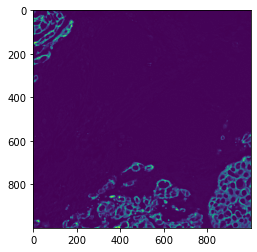

In [27]:
small = img[5000:6000, 5000:6000]
plt.imshow(small)

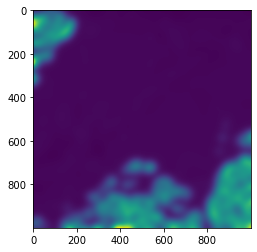

In [28]:
f = gaussian(small, sigma=20.)
plt.imshow(f)

In [33]:
f = gaussian(img, sigma=50.)


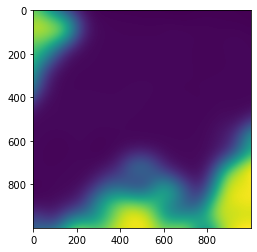

In [34]:
small = f[5000:6000, 5000:6000]
plt.imshow(small)

In [32]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_2/tumor_blurred.tif',
                data=f)

In [4]:

clf = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor.ome.tif')


In [5]:
clf.shape

(15120, 13440)

In [6]:
set(clf[:5000].flatten())

{0, 1}

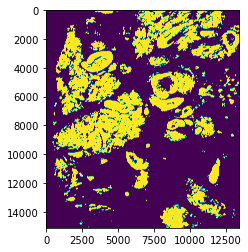

In [8]:
plt.imshow(clf)

In [13]:
holes = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor_holes.ome.tif')


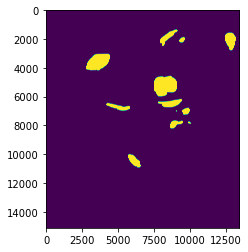

In [14]:
plt.imshow(holes)

In [15]:
np.unique(holes)

array([0, 1], dtype=uint8)

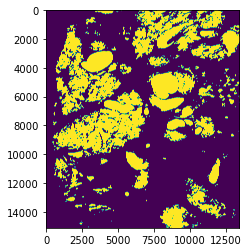

In [16]:
plt.imshow(holes | clf)

In [17]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor.tif',
                data=holes | clf)